# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# File Path
colab_path = '/content/drive/MyDrive/Colab Notebooks/'
file_path = 'Econ_0150_Project/'

# Mount Google Drive
# drive.mount('/content/drive') # Already mounted
os.chdir(colab_path + file_path)
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('Student Mental health.csv')

In [ ]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here
data["gender_binary"] = data["Choose your gender"].str.lower().map({
    "male": 0,
    "female": 1
})
data['depression_binary'] = data['Do you have Depression?'].map({
    'Yes': 1,
    'No': 0
})
data['anxiety_binary'] = data['Do you have Anxiety?'].map({
    'Yes': 1,
    'No': 0
})
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,gender_binary,depression_binary,anxiety_binary
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,0,0,1
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,0,1,1
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,1,1,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,0,0,0


In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv', index=False)

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
model = smf.ols('gender_binary ~ depression_binary', data).fit()
print(model.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6970      0.054     12.955      0.000       0.590       0.804
depression_binary     0.1316      0.091      1.440      0.153      -0.050       0.313


In [ ]:
model = smf.ols('gender_binary ~ anxiety_binary', data).fit()
print(model.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7612      0.054     14.134      0.000       0.654       0.868
anxiety_binary    -0.0553      0.093     -0.596      0.553      -0.239       0.129


## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

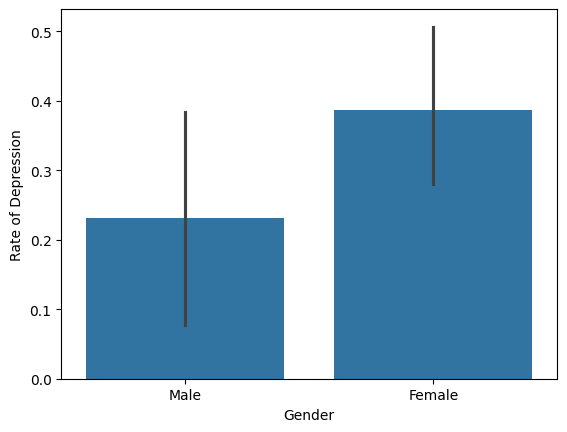

In [ ]:
# Build and run your model here
ax = sns.barplot(data, x='gender_binary', y='depression_binary')
plt.xlabel('Gender')
plt.ylabel('Rate of Depression')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

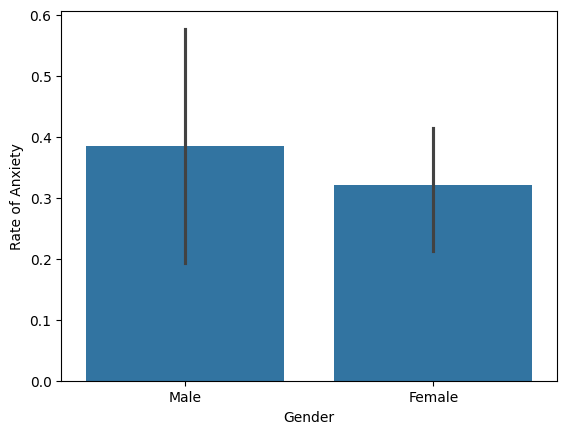

In [ ]:
ax = sns.barplot(data, x='gender_binary', y='anxiety_binary')
plt.xlabel('Gender')
plt.ylabel('Rate of Anxiety')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()